In [2]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
from pylab import rcParams
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib
import statsmodels
import sklearn

In [4]:
# library versions used
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Seaborn version:',sns.__version__)
print('Statsmodels version:',statsmodels.__version__)
print('Sci-kit learn version:',sklearn.__version__)

Numpy version: 1.19.1
Pandas version: 1.1.1
Matplotlib version: 3.2.1
Seaborn version: 0.10.1
Statsmodels version: 0.11.1
Sci-kit learn version: 0.22.2.post1


### Question 1:

In [5]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col=0)

In [6]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [7]:
rcParams['figure.figsize'] = 15,8

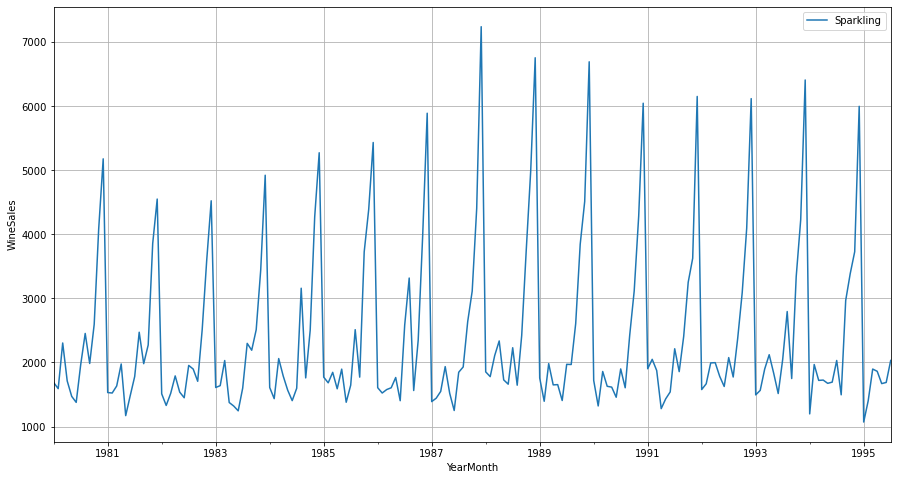

In [251]:
df.plot()
plt.ylabel('WineSales')
plt.grid()

### Question 2:

In [9]:
df.shape

(187, 1)

In [10]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [12]:
df.isnull().sum()   # no null values

Sparkling    0
dtype: int64

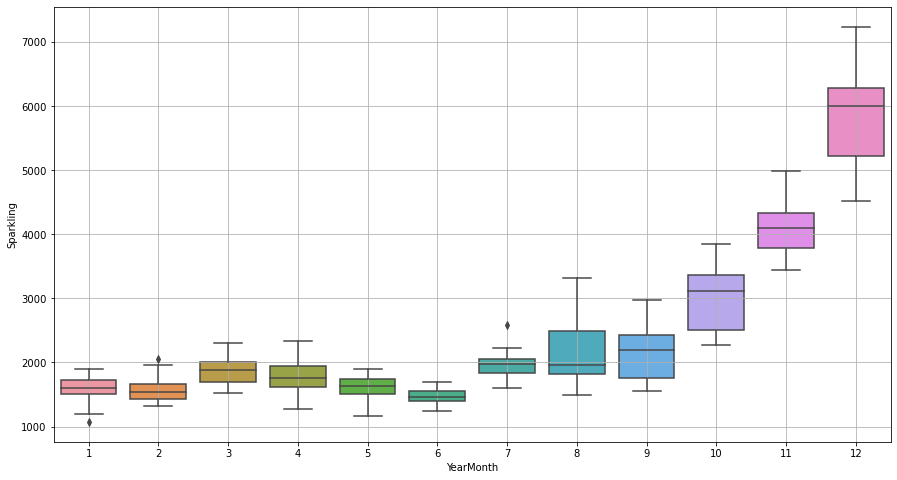

In [13]:
sns.boxplot(x=df.index.month,y=df['Sparkling'])
plt.grid();

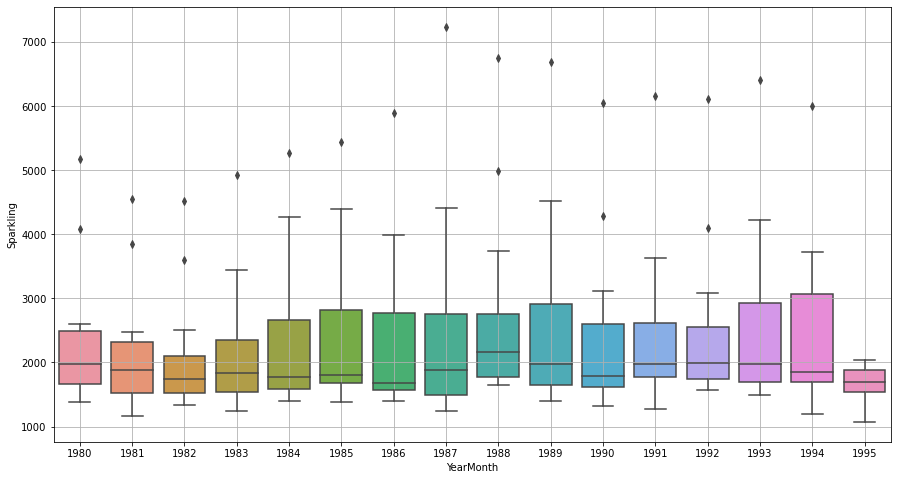

In [14]:
sns.boxplot(x=df.index.year,y=df['Sparkling'])
plt.grid();

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

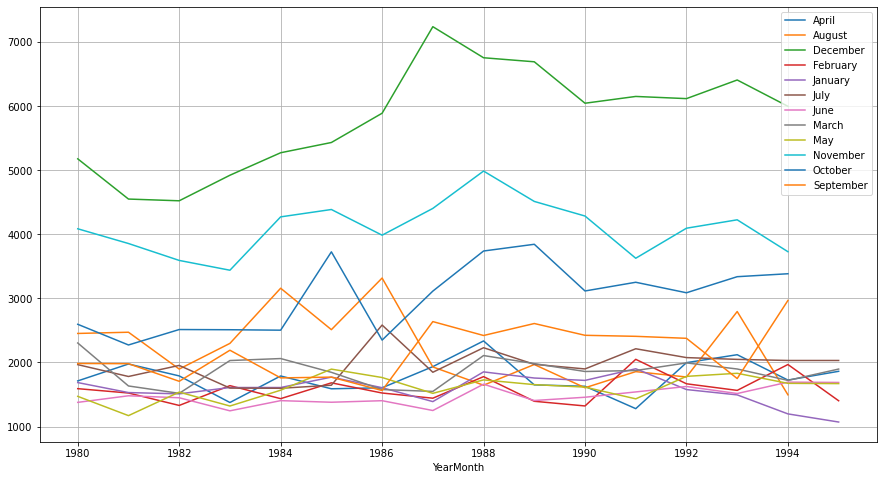

In [16]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Decompose the Time Series to understand the various components.

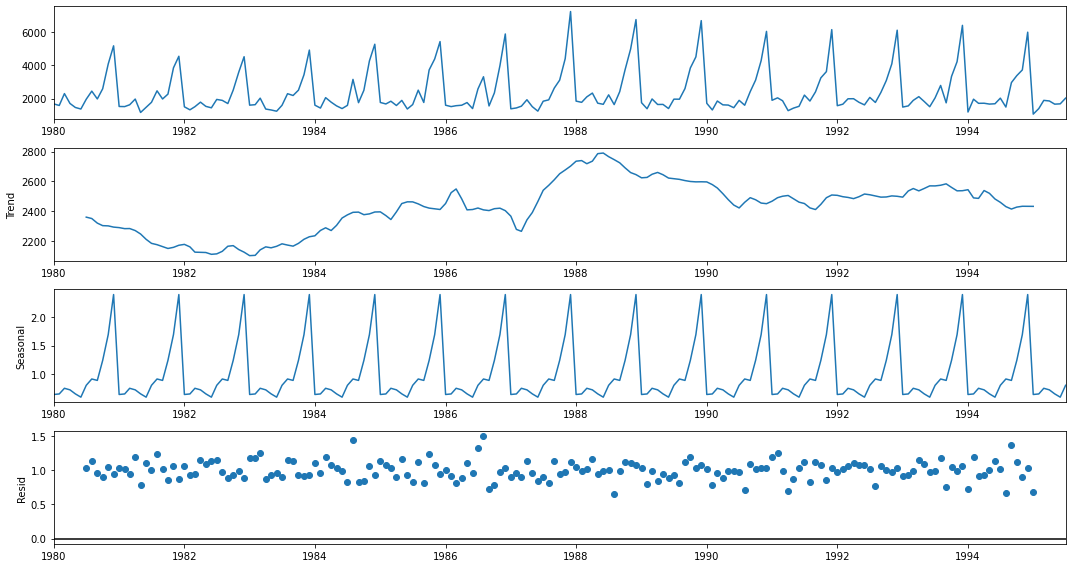

In [17]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

### Question 3:

In [26]:
train = df[df.index<pd.to_datetime('1991-01-01')]
test = df[df.index>pd.to_datetime('1990-12-01')]

In [35]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [33]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



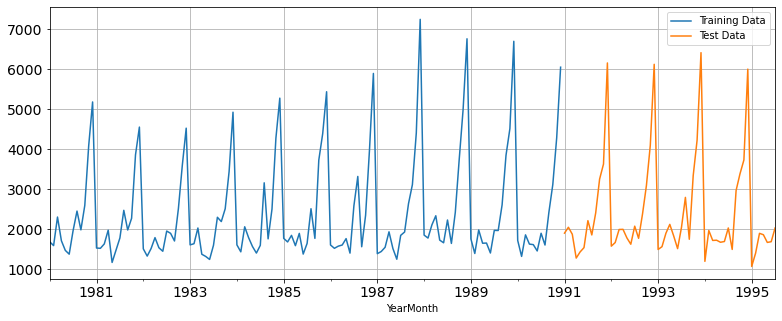

In [36]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Question 4:

#### Model 1: Built a Linear Regression using the Time Stamped order of occurence of the Wine sales. 

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

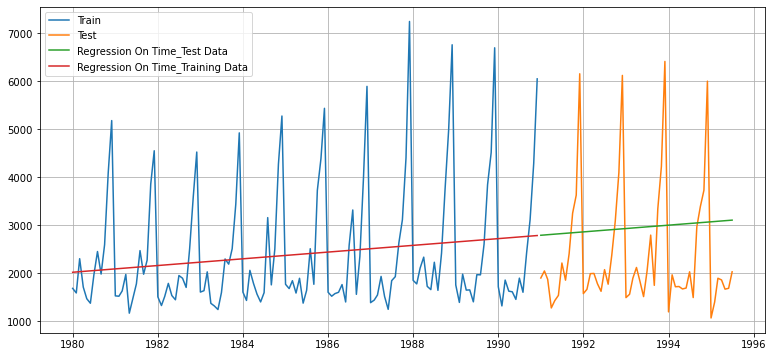

In [50]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

#### Evaluate this model on the test data using Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE).

In [43]:
from sklearn import metrics

In [44]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [45]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [46]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

#### Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [48]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [51]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: naive, dtype: int64

In [52]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

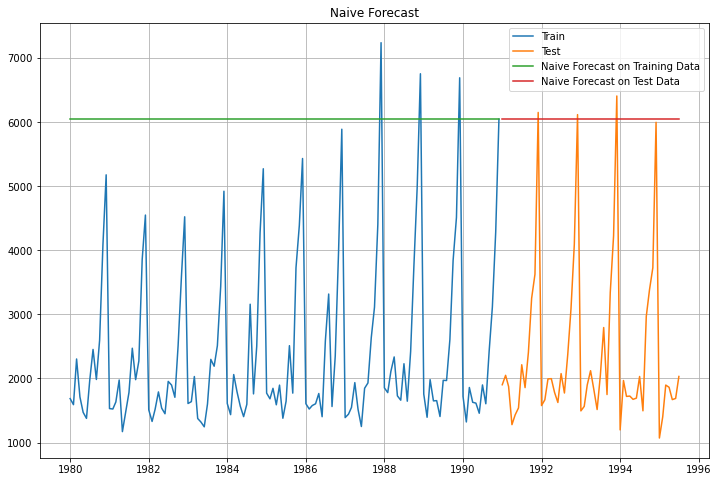

In [53]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [252]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For Naive Approach forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Approach forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [55]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [56]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [57]:
## Let us get the mean value (or simple avegrage) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
YearMonth                           
1980-01-01       1686    2403.780303
1980-02-01       1591    2403.780303
1980-03-01       2304    2403.780303
1980-04-01       1712    2403.780303
1980-05-01       1471    2403.780303

In [58]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

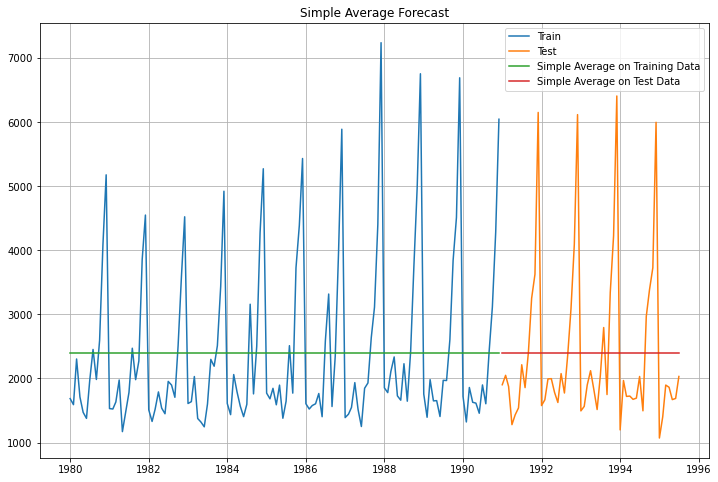

In [59]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [60]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [61]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [62]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

### Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [63]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [64]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

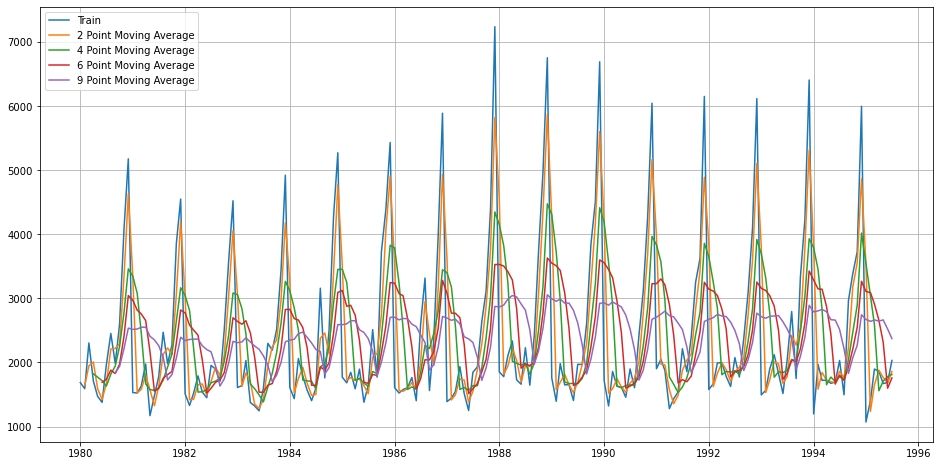

In [65]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average needs to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [66]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<pd.to_datetime('1991-01-01')] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>pd.to_datetime('1990-12-01')]

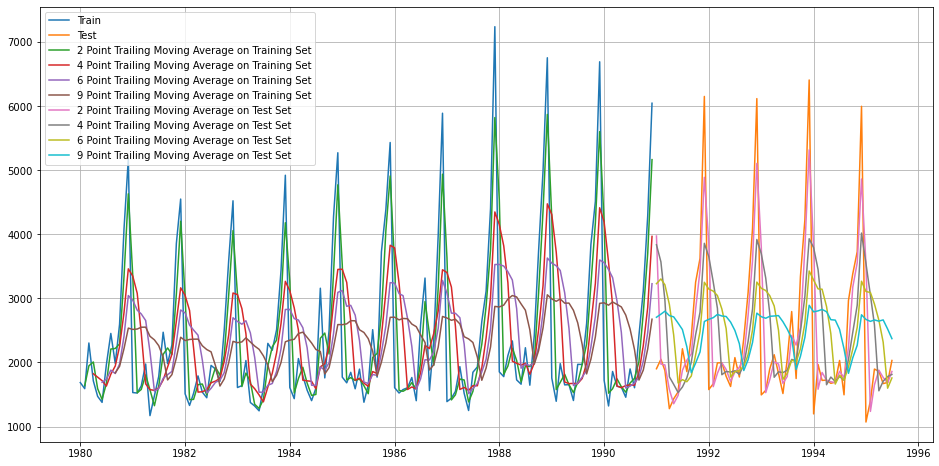

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

##### Done only on the test data.

In [253]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 MAPE is 46.86


In [69]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

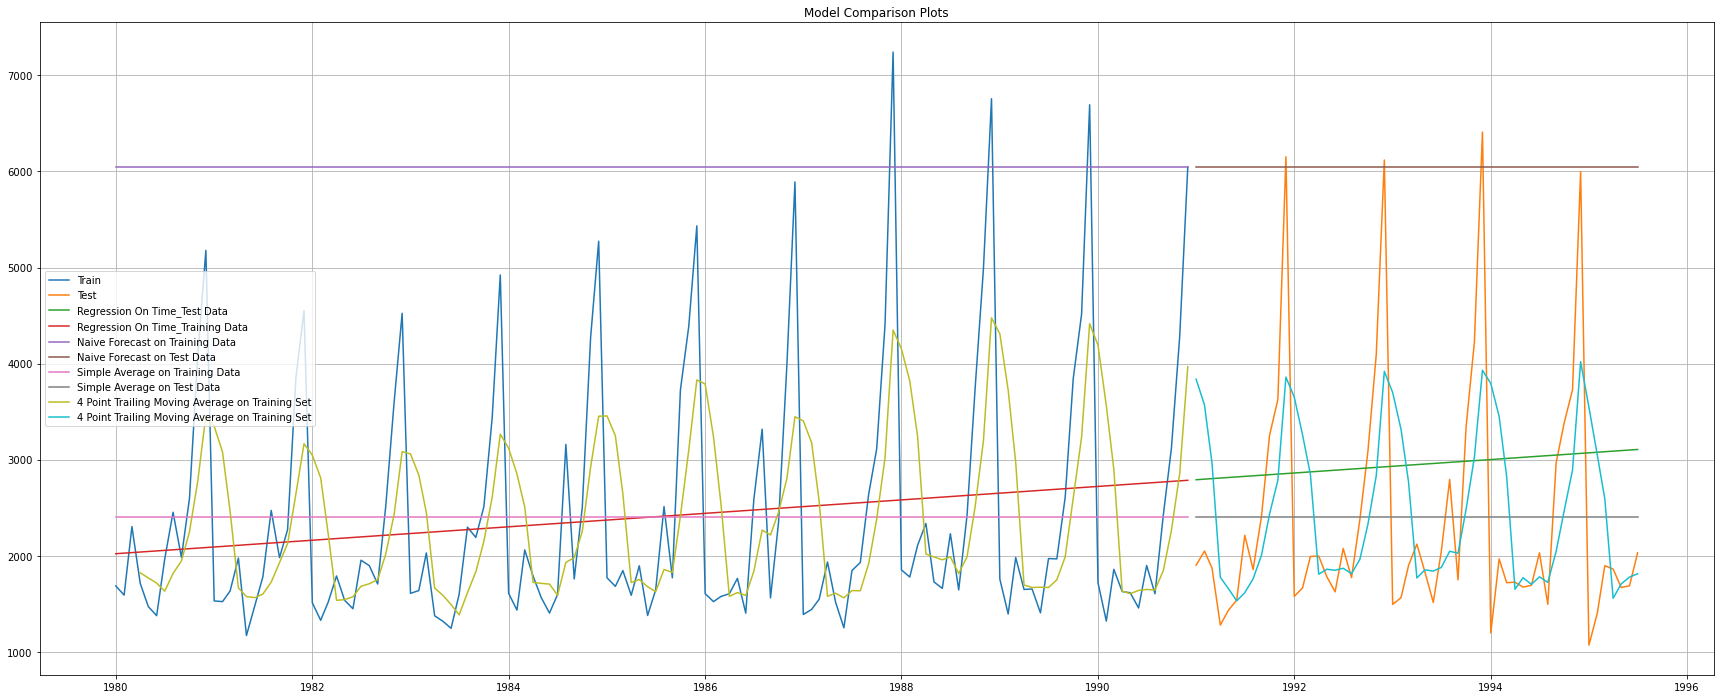

In [70]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [74]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.762550263244,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling     predict
YearMonth                        
1980-01-01       1686  2403.76255
1980-02-01       1591  2403.76255
1980-03-01       2304  2403.76255
1980-04-01       1712  2403.76255
1980-05-01       1471  2403.76255

In [77]:
len(SES_test)

55

In [78]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sparkling     predict
YearMonth                        
1991-01-01       1902  2403.76255
1991-02-01       2049  2403.76255
1991-03-01       1874  2403.76255
1991-04-01       1279  2403.76255
1991-05-01       1432  2403.76255

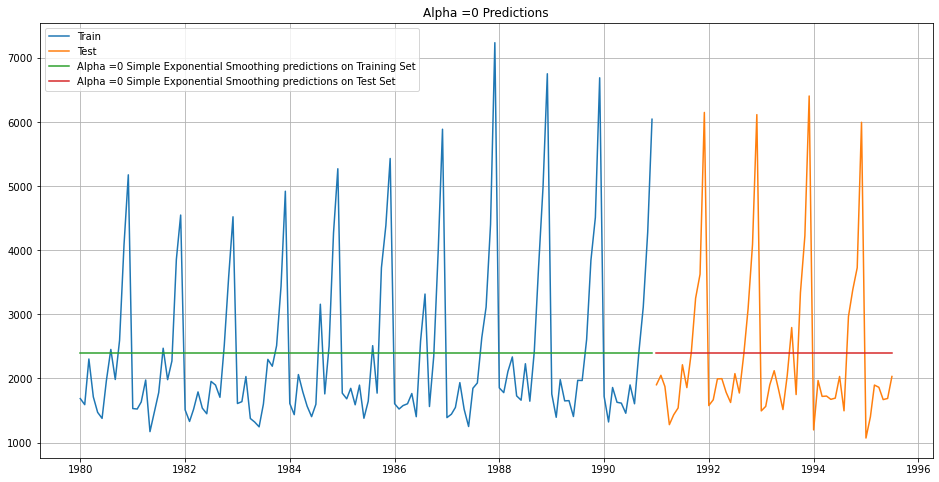

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions');

#### Model Evaluation for $\alpha$ = 0 : Simple Exponential Smoothing

In [81]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [254]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =0 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [94]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1389.135175      50.15
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.081804      38.90
2pointTrailingMovingAverage          813.400684      19.70
4pointTrailingMovingAverage         1156.589694      35.96
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing  1275.081739      38.90

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [89]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [90]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [91]:
resultsDf_6

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.1  1331.786996       42.30  1375.393526      49.53
1           0.2  1355.645334       43.91  1595.206839      60.46
2           0.3  1359.422162       43.80  1935.507132      75.66
3           0.4  1352.562367       42.79  2311.919615      91.55
4           0.5  1343.994119       41.18  2666.351413     106.27
5           0.6  1338.801427       39.81  2979.204388     118.77
6           0.7  1338.843298       38.56  3249.944092     129.34
7           0.8  1344.462035       37.60  3483.801006     138.34
8           0.9  1355.723493       36.79  3686.794285     146.08

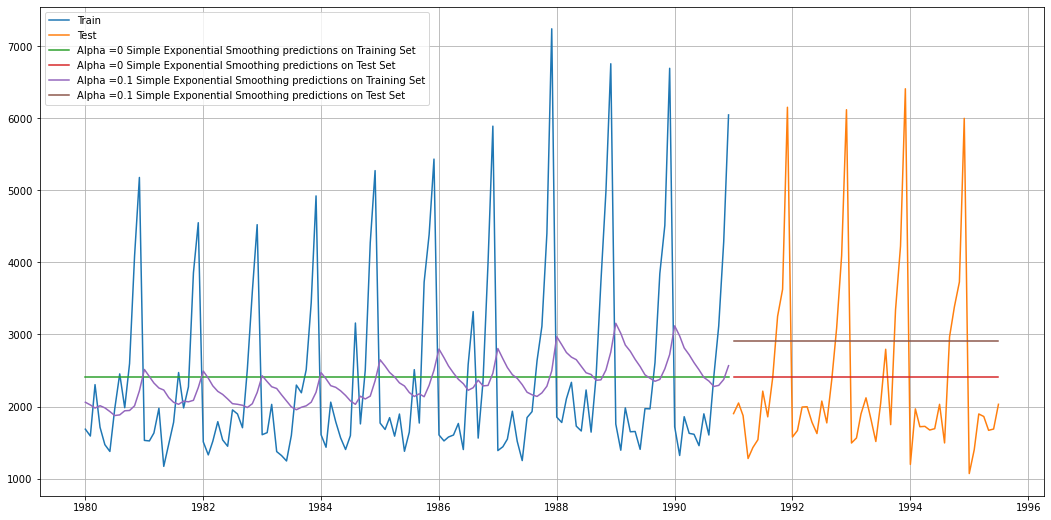

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1389.135175      50.15
NaiveModel                            3864.279352     152.87
SimpleAverageModel                    1275.081804      38.90
2pointTrailingMovingAverage            813.400684      19.70
4pointTrailingMovingAverage           1156.589694      35.96
6pointTrailingMovingAverage           1283.927428      43.86
9pointTrailingMovingAverage           1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing    1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing  1375.393526      49.53

### Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [97]:
DES_train = train.copy()
DES_test = test.copy()

In [98]:
model_DES = Holt(DES_train['Sparkling'])

In [111]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [112]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [113]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.1          0.1  1363.474023       44.26   1779.424029   
1            0.1          0.2  1401.756935       45.65   2599.788597   
2            0.1          0.3  1435.329601       46.85   4290.125020   
3            0.1          0.4  1471.353975       48.26   6041.557151   
4            0.1          0.5  1512.136257       49.84   7389.055397   
..           ...          ...          ...         ...           ...   
95           1.0          0.6  1753.362280       45.75  49327.087977   
96           1.0          0.7  1825.157067       47.96  52655.765663   
97           1.0          0.8  1901.992952       50.09  55442.273880   
98           1.0          0.9  1985.351413       52.00  57823.177011   
99           1.0          1.0  2077.647486       53.78  59877.076519   

    Test MAPE  
0       67.23  
1       95.44  
2      155.32  
3      219.06  
4      267.88  
..        ...  
95    1824.42  
96    1945.23  
97    2046.36  
98    2132.75  
99    2207.28  

[100 rows x 6 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [114]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1363.474023       44.26  1779.424029      67.23
1            0.1          0.2  1401.756935       45.65  2599.788597      95.44
10           0.2          0.1  1412.033053       46.62  3611.765464     135.41
2            0.1          0.3  1435.329601       46.85  4290.125020     155.32
20           0.3          0.1  1428.274417       46.92  5908.185554     223.50

In [115]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1363.474023       44.26  1779.424029      67.23
1            0.1          0.2  1401.756935       45.65  2599.788597      95.44
10           0.2          0.1  1412.033053       46.62  3611.765464     135.41
2            0.1          0.3  1435.329601       46.85  4290.125020     155.32
3            0.1          0.4  1471.353975       48.26  6041.557151     219.06

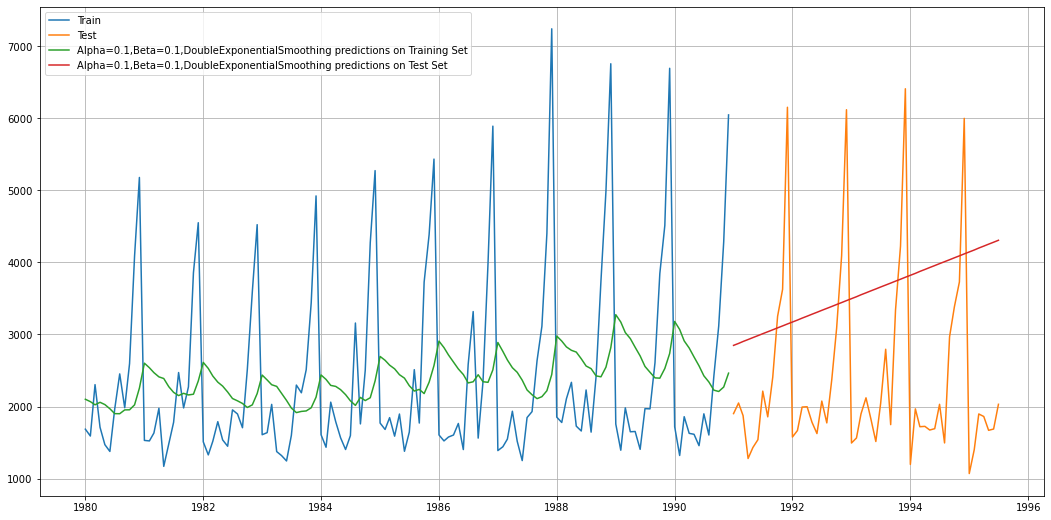

In [116]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [117]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                               1389.135175      50.15
NaiveModel                                     3864.279352     152.87
SimpleAverageModel                             1275.081804      38.90
2pointTrailingMovingAverage                     813.400684      19.70
4pointTrailingMovingAverage                    1156.589694      35.96
6pointTrailingMovingAverage                    1283.927428      43.86
9pointTrailingMovingAverage                    1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing             1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing           1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1779.424029      67.23

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [118]:
TES_train = train.copy()
TES_test = test.copy()

In [120]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

In [121]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [122]:
model_TES_autofit.params

{'smoothing_level': 0.15419711535625433,
 'smoothing_slope': 2.502931335238539e-21,
 'smoothing_seasonal': 0.3713422762299586,
 'damping_slope': nan,
 'initial_level': 1639.999331311309,
 'initial_slope': 4.844764142652403,
 'initial_seasons': array([1.00842903, 0.96899111, 1.24181057, 1.13206413, 0.93980744,
        0.93811312, 1.22459056, 1.54430481, 1.27336743, 1.63199617,
        2.48297321, 3.1186758 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
YearMonth                          
1980-01-01       1686   1658.708538
1980-02-01       1591   1602.577518
1980-03-01       2304   2057.511680
1980-04-01       1712   1915.810113
1980-05-01       1471   1568.914450

In [125]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1602.185161
1991-02-01       2049   1373.870447
1991-03-01       1874   1807.420289
1991-04-01       1279   1704.547669
1991-05-01       1432   1602.351403

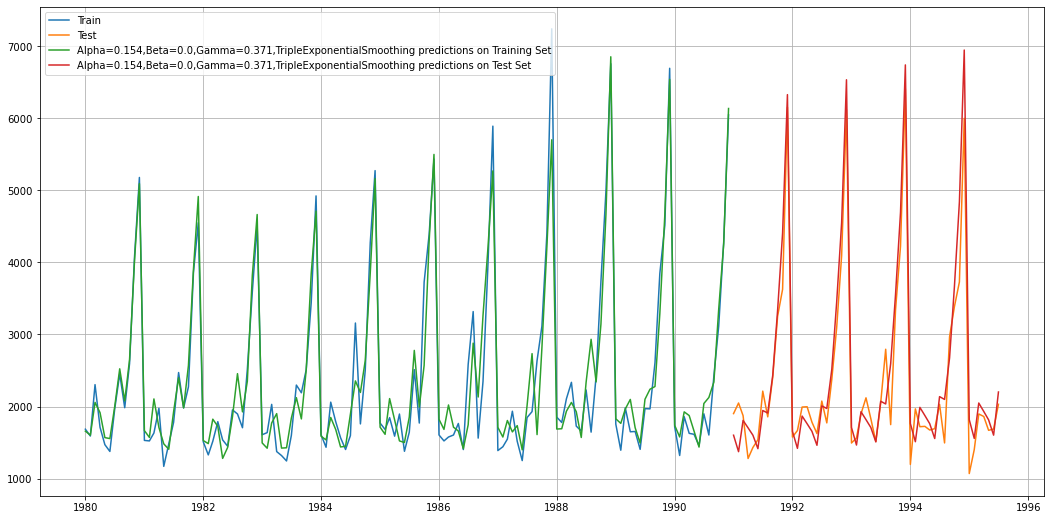

In [126]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

#### Model evaluation for Alpha=0.154,Beta=0.0,Gamma=0.371

In [127]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha=0.154,Beta=0.0 and Gamma=0.371, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha=0.154,Beta=0.0 and Gamma=0.371, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 353.379 MAPE is 10.17


In [128]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha=0.154,Beta=0.0 and Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha=0.154,Beta=0.0 and Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.074 MAPE is 11.90


In [129]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424029      67.23
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90

In [165]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [166]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.2,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [167]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE  Train MAPE  \
0             0.1          0.1           0.2     362.261720       10.72   
1             0.1          0.1           0.3     359.457131       10.48   
2             0.1          0.1           0.4     359.463534       10.37   
3             0.1          0.1           0.5     363.288489       10.43   
4             0.1          0.1           0.6     370.580768       10.57   
..            ...          ...           ...            ...         ...   
895           1.0          1.0           0.6  133843.577353     1201.52   
896           1.0          1.0           0.7   93702.665037     1031.69   
897           1.0          1.0           0.8  104691.065082     1039.56   
898           1.0          1.0           0.9  153710.350473     1385.15   
899           1.0          1.0           1.0  239920.549975     1304.98   

        Test RMSE  Test MAPE  
0    6.243177e+02      21.10  
1    6.399448e+02      21.73  
2    6.448193e+02      22.23  
3    6.411004e+02      22.29  
4    6.333610e+02      22.15  
..            ...        ...  
895  8.243499e+05   18085.61  
896  1.397222e+06   25633.70  
897  3.959306e+06   55483.05  
898  5.642231e+05    8676.89  
899  1.211432e+05    3173.70  

[900 rows x 7 columns]

In [168]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
270           0.4          0.1           0.2  373.281410       11.05   
189           0.3          0.2           0.2  377.346884       11.23   
361           0.5          0.1           0.3  390.181766       11.54   
362           0.5          0.1           0.4  401.059714       11.55   
360           0.5          0.1           0.2  384.608387       11.44   

      Test RMSE  Test MAPE  
270  312.211273      10.20  
189  315.195243      10.07  
361  325.690160       9.99  
362  343.322058      11.07  
360  344.182057      10.67

In [169]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
361           0.5          0.1           0.3  390.181766       11.54   
189           0.3          0.2           0.2  377.346884       11.23   
270           0.4          0.1           0.2  373.281410       11.05   
360           0.5          0.1           0.2  384.608387       11.44   
362           0.5          0.1           0.4  401.059714       11.55   

      Test RMSE  Test MAPE  
361  325.690160       9.99  
189  315.195243      10.07  
270  312.211273      10.20  
360  344.182057      10.67  
362  343.322058      11.07

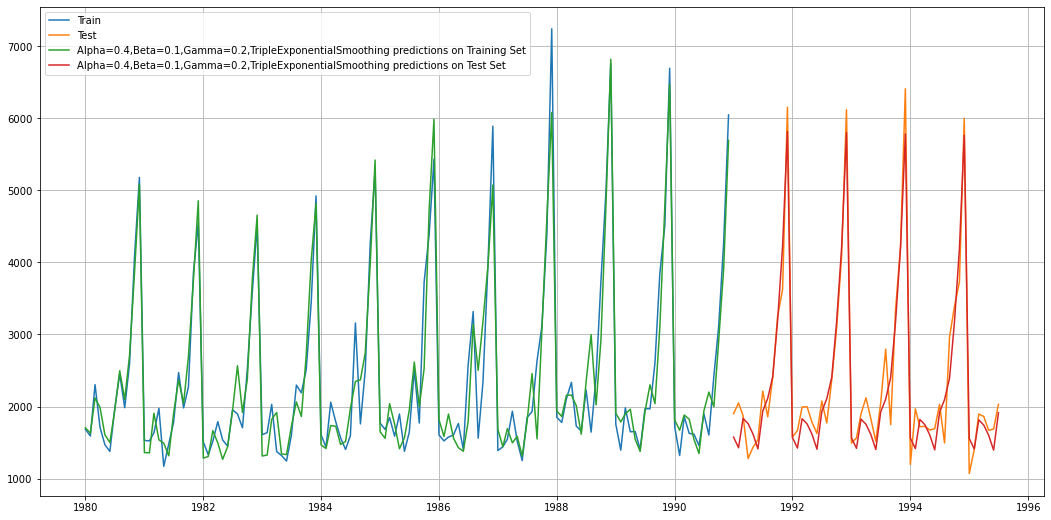

In [172]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination for least RMSE

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

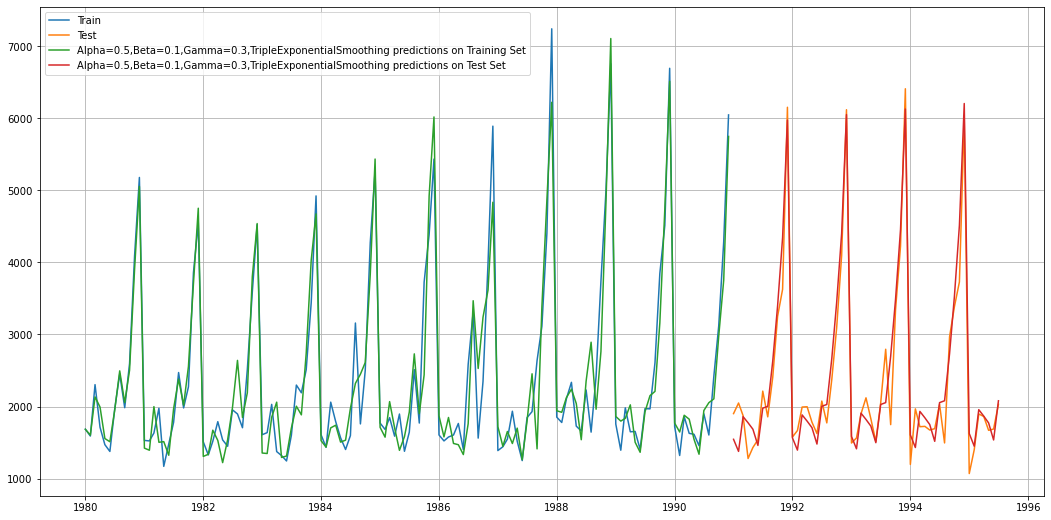

In [173]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination for least MAPE

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.5, 0.1, 0.3], label='Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.5, 0.1, 0.3], label='Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [174]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][270]],'Test MAPE':[resultsDf_8_2['Test MAPE'][270]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424029      67.23
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20

In [175]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][361]],'Test MAPE':[resultsDf_8_2['Test MAPE'][361]]}
                           ,index=['Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424029      67.23
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20
Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialS...   325.690160       9.99

In [176]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                       Test RMSE  Test MAPE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20
Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialS...   325.690160       9.99
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
SimpleAverageModel                                  1275.081804      38.90
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
RegressionOnTime                                    1389.135175      50.15
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.4

#### We see that the best model as per RMSE is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.4, $\beta$ = 0.1 and $\gamma$ = 0.2.
#### And we see that the best model as per MAPE is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.5, $\beta$ = 0.1 and $\gamma$ = 0.3.

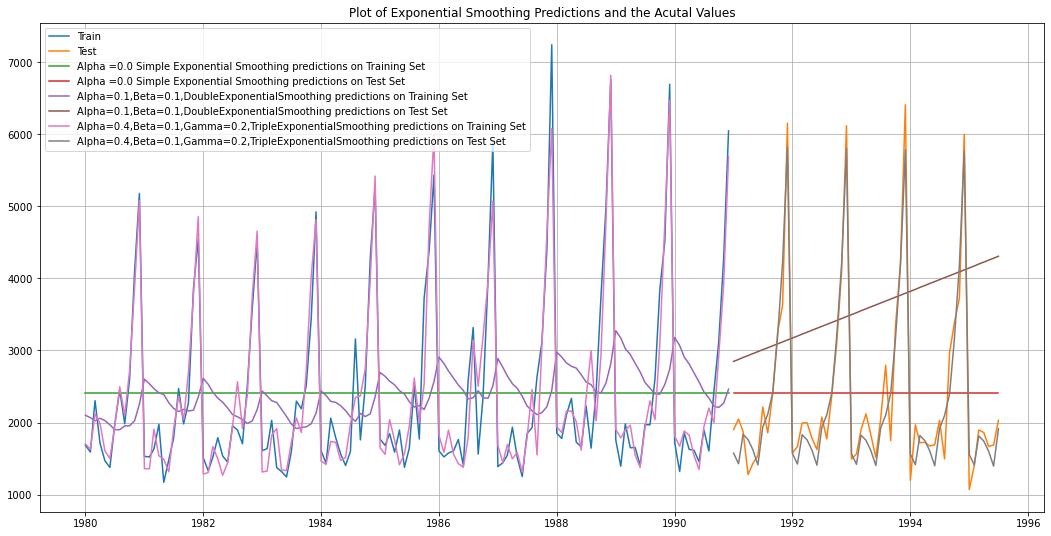

In [178]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

### Question 5:

In [258]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

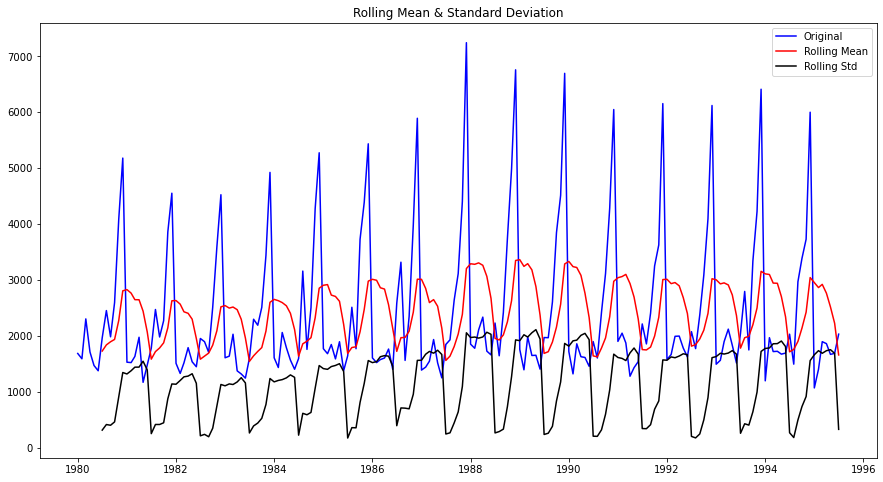

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [259]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

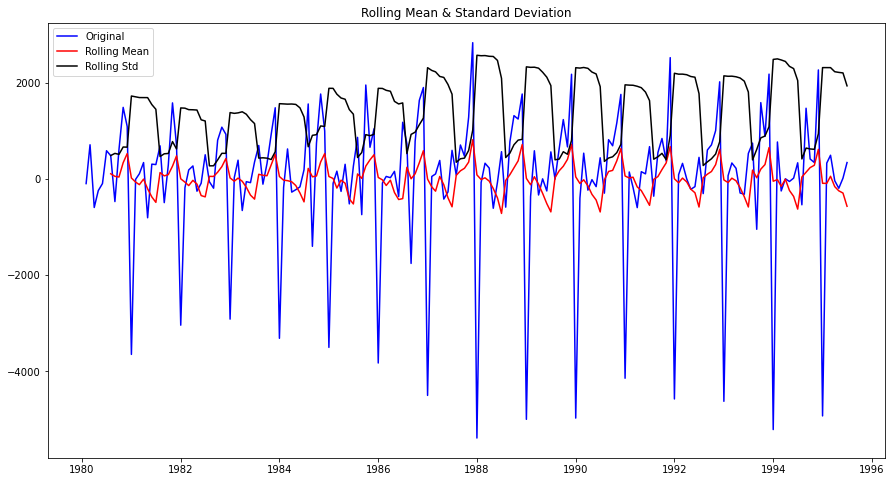

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [260]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

### Question 6:

#### Built an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion.

In [185]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [186]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [193]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155926277
ARIMA(0, 1, 2) - AIC:2234.408323125786
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946739166
ARIMA(1, 1, 2) - AIC:2234.5272004518274
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626295803
ARIMA(2, 1, 2) - AIC:2213.5092124846246


In [194]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8   (2, 1, 2)  2210.616302
26  (2, 1, 2)  2213.509212
17  (2, 1, 2)  2213.509212
7   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
5   (1, 1, 2)  2233.597647
16  (2, 1, 1)  2233.777626
25  (2, 1, 1)  2233.777626
20  (0, 1, 2)  2234.408323
11  (0, 1, 2)  2234.408323
23  (1, 1, 2)  2234.527200
14  (1, 1, 2)  2234.527200
4   (1, 1, 1)  2235.013945
22  (1, 1, 1)  2235.755095
13  (1, 1, 1)  2235.755095
15  (2, 1, 0)  2260.365744
24  (2, 1, 0)  2260.365744
6   (2, 1, 0)  2262.035600
10  (0, 1, 1)  2263.060016
19  (0, 1, 1)  2263.060016
1   (0, 1, 1)  2264.906438
21  (1, 1, 0)  2266.608539
12  (1, 1, 0)  2266.608539
9   (0, 1, 0)  2267.663036
18  (0, 1, 0)  2267.663036
3   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [195]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 12 Sep 2020   AIC                           2213.509
Time:                        01:51:25   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

#### Predict on the Test Set using this model and evaluate the model.

In [196]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [197]:
## Test Data

rmse_model7_test = metrics.mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape_model7_test = MAPE(TES_test['Sparkling'],predicted_auto_ARIMA)
print("For order (2,1,2) ARIMA model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_test, mape_model7_test))

For order (2,1,2) ARIMA model forecast on the Test Data,  RMSE is 1299.980 MAPE is 43.20


In [198]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_model7_test],'Test MAPE':[mape_model7_test]}
                           ,index=['(2,1,2) ARIMA Model'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424029      67.23
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20
Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialS...   325.690160       9.99
(2,1,2) ARIMA Model                                 1299.979751      43.20

#### Built an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Setting the seasonality as 12 for the auto SARIMA model.

In [211]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [212]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [213]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.261461684376
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640237908
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.862633467869
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.677357425001
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389572
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791699
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908187872
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.528962130773
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470853
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.205415861743
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.989805392076
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.500098186668
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.991155367016
S

SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324115756
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645146
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140970121814
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.6086050758654
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.3404024967826
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644411732
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.120089246564
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.097242002704
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:1600.2581747584256
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:1573.5476000435335
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:1561.0222431137488
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339990126
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161213893
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.6277846072244


In [214]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
95   (1, 1, 2)  (0, 1, 2, 12)  1382.347780
41   (0, 1, 2)  (0, 1, 2, 12)  1382.484254
101  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
149  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
47   (0, 1, 2)  (1, 1, 2, 12)  1384.398867

In [215]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sat, 12 Sep 2020   AIC                           1382.348
Time:                                    03:25:46   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

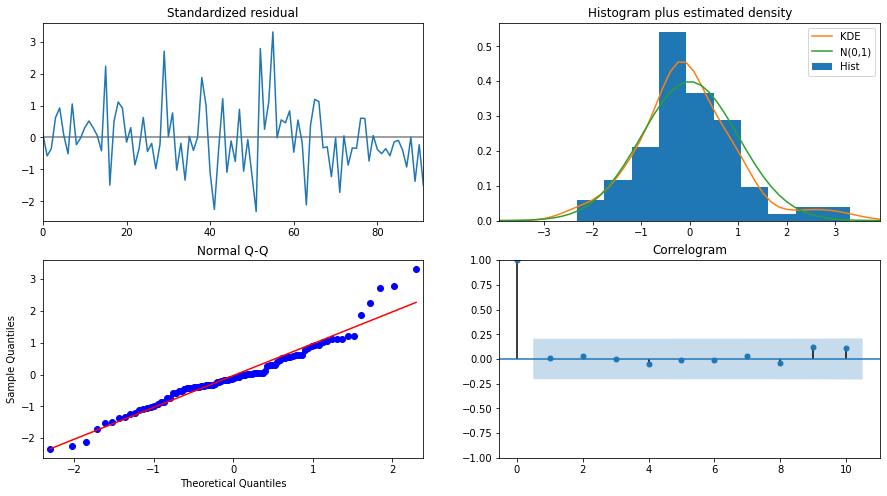

In [216]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

We see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Model Evaluation on Test set

In [217]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [218]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1460.244626  412.922789     650.930832    2269.558420
1  1392.437175  429.721320     550.198864    2234.675486
2  1743.201692  430.065886     900.288045    2586.115339
3  1650.066937  433.930048     799.579672    2500.554202
4  1522.656023  434.242935     671.555511    2373.756535

In [219]:
## Test Data

rmse_model8_test = metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape_model8_test = MAPE(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean)
print("For order (1,1,2)(0,1,2,12) SARIMA model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model8_test, mape_model8_test))

For order (1,1,2)(0,1,2,12) SARIMA model forecast on the Test Data,  RMSE is 382.577 MAPE is 12.87


In [220]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_model8_test],'Test MAPE':[mape_model8_test]}
                           ,index=['(1,1,2)(0,1,2,12) SARIMA Model'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424029      67.23
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20
Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialS...   325.690160       9.99
(2,1,2) ARIMA Model                                 1299.979751      43.20
(1,1,2)(1,0,2,12) SARIMA Model                       528.652096      18.89
(1,1,2)(0,1,2,12) SARIMA Model                       382.576720      12.87

### Question 7:

#### Built a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots.

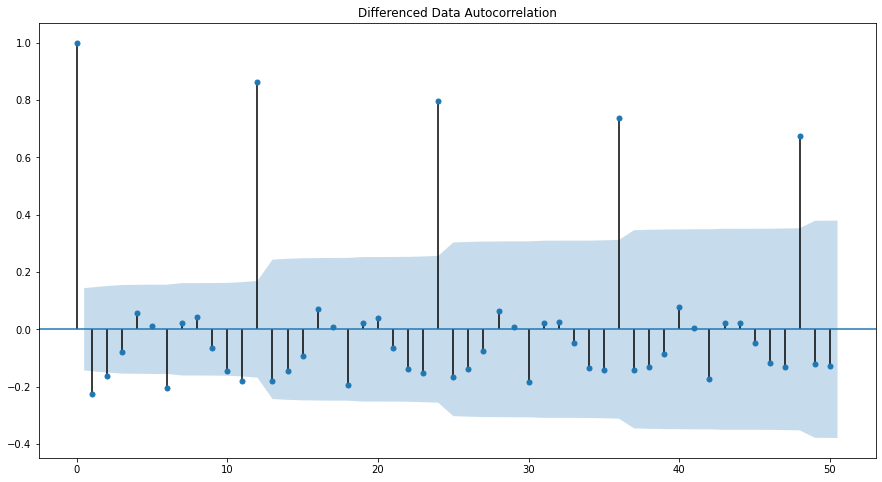

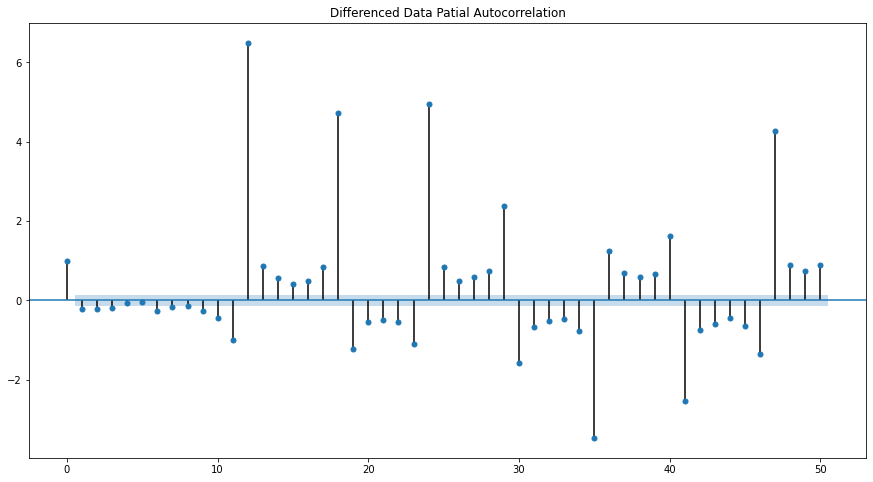

In [210]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

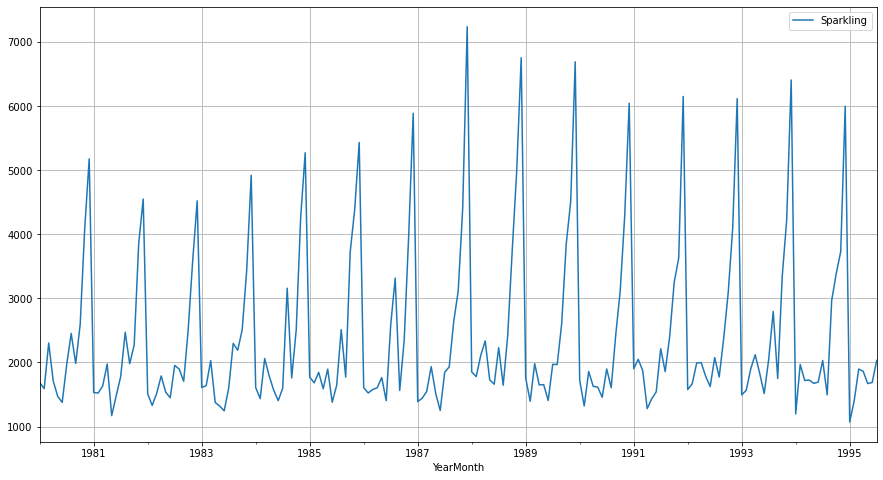

In [221]:
df.plot()
plt.grid();

We see that there is a seasonality and there might be a trend. So, now we take a seasonal differencing and check the series.

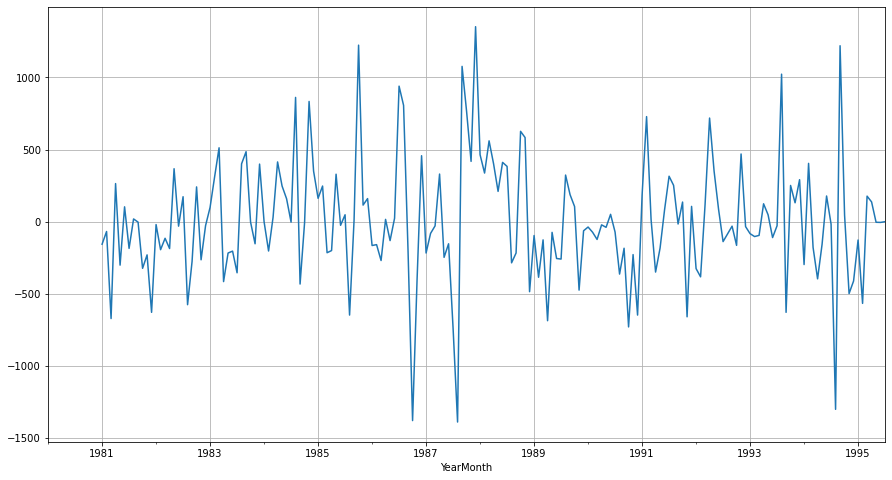

In [223]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

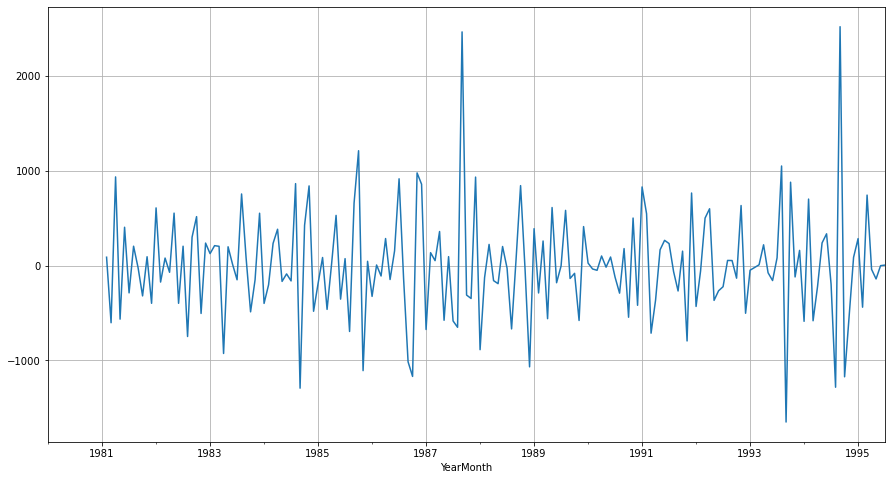

In [224]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

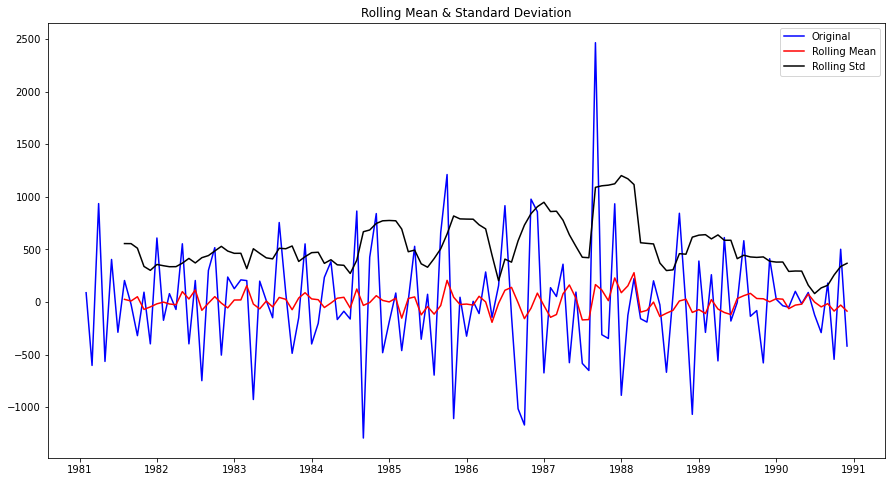

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [226]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

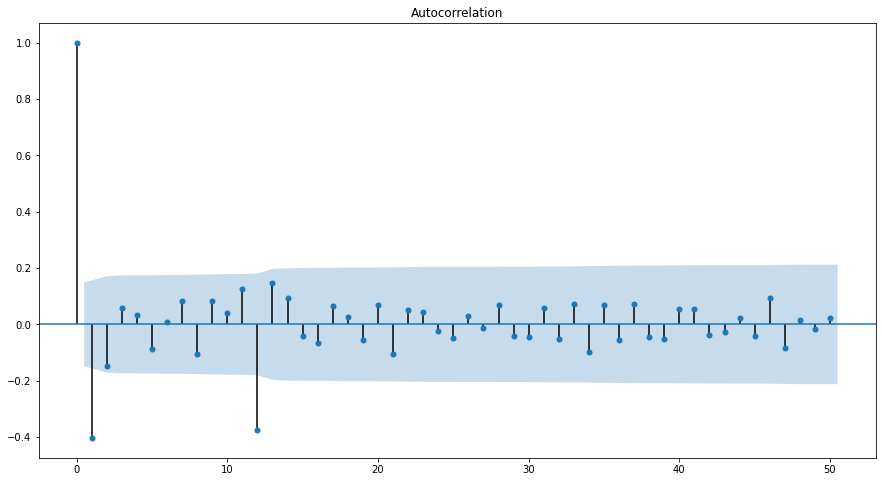

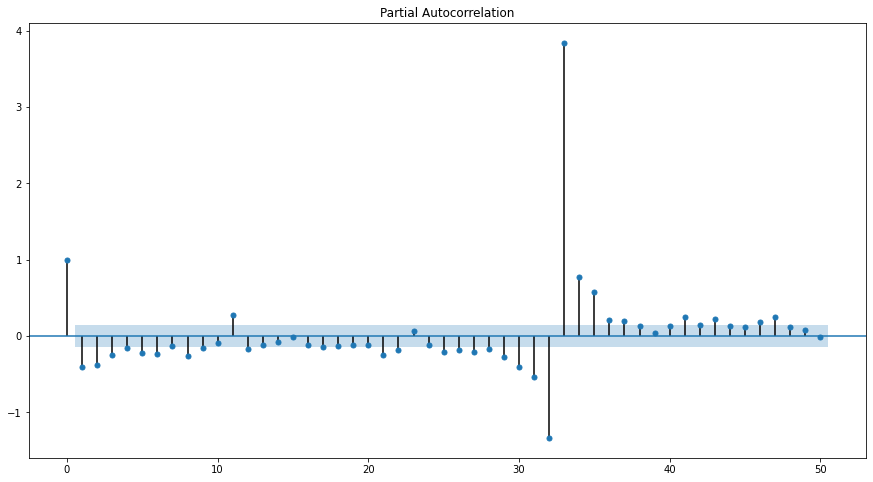

In [229]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=50);

In [230]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -772.847
Date:                            Sat, 12 Sep 2020   AIC                           1559.693
Time:                                    04:15:15   BIC                           1578.204
Sample:                                         0   HQIC                          1567.192
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1783      0.125      1.425      0.154      -0.067       0.424
ar.L2         -0.0904      0.127   

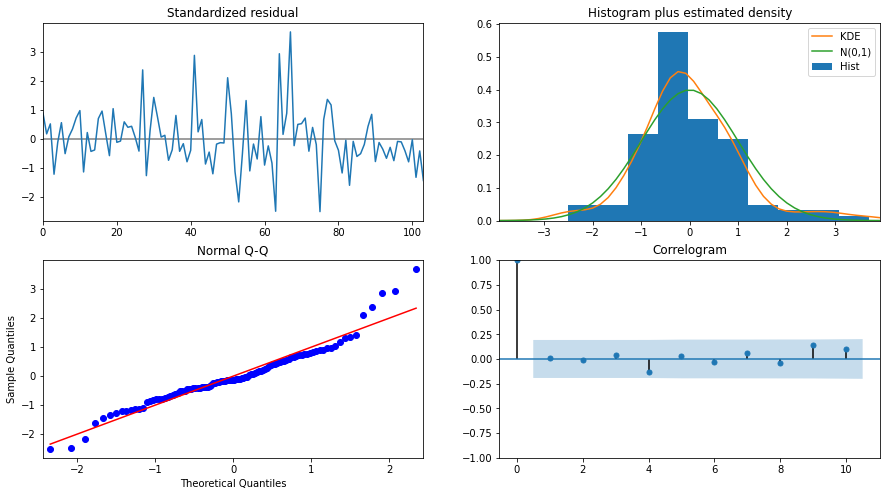

In [231]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

#### Model Evaluation on Test set

In [232]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [233]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1510.543540  407.197834     712.450451    2308.636629
1  1304.990077  419.626414     482.537419    2127.442734
2  1769.571081  419.746627     946.882810    2592.259352
3  1596.669526  422.059270     769.448558    2423.890495
4  1520.849469  424.083686     689.660717    2352.038221

In [234]:
## Test Data

rmse_model8_test_1 = metrics.mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape_model8_test_1 = MAPE(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean)
print("For order (3,1,1)(1,1,1,12) SARIMA model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model8_test_1, mape_model8_test_1))

For order (3,1,1)(1,1,1,12) SARIMA model forecast on the Test Data,  RMSE is 412.781 MAPE is 13.91


In [235]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1],'Test MAPE':[mape_model8_test_1]}
                           ,index=['(3,1,1)(1,1,1,12) SARIMA Model'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424029      67.23
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20
Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialS...   325.690160       9.99
(2,1,2) ARIMA Model                                 1299.979751      43.20
(1,1,2)(1,0,2,12) SARIMA Model                       528.652096      18.89
(1,1,2)(0,1,2,12) SARIMA Model                       382.576720      12.87
(3,1,1)(1,1,1,12) SARIMA Model                       412.781128      13.91

### Question 8:

In [236]:
type(resultsDf)

pandas.core.frame.DataFrame

#### I have made the dataframe 'resultsDf' and concatenated all the model's performance measures on the same.

#### The model name and their parameters are written as an index

Sorting the results dataframe as per RMSE and MAPE separately, to find out the most optimum model

In [237]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                       Test RMSE  Test MAPE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   312.211273      10.20
Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialS...   325.690160       9.99
(1,1,2)(0,1,2,12) SARIMA Model                       382.576720      12.87
Alpha=0.154,Beta=0.0,Gamma=0.371,TripleExponent...   383.074293      11.90
(3,1,1)(1,1,1,12) SARIMA Model                       412.781128      13.91
(1,1,2)(1,0,2,12) SARIMA Model                       528.652096      18.89
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
Alpha=0,SimpleExponentialSmoothing                  1275.081739      38.90
SimpleAverageModel                                  1275.081804      38.90
6pointTrailingMovingAverage                         1283.927428      43.86
(2,1,2) ARIMA Model                                 1299.9

#### We can see that as per the least RMSE, the best model is Triple Exponential smoothing with parameters Alpha=0.4,Beta=0.1,Gamma=0.2. 
#### And as per the least MAPE, the best model is Triple Exponential smoothing with parameters Alpha=0.5,Beta=0.1,Gamma=0.3.

### Question 9:

#### Built the Holt Winter's model on the whole data using the most optimal parameters and forecasted for the next 12 months

In [238]:
model_TES_full = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

In [241]:
model_TES_full_fit = model_TES_full.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
model_TES_full_predict = model_TES_full_fit.forecast(steps=12)

In [242]:
model_TES_full_predict

1995-08-01    2063.607904
1995-09-01    2579.792820
1995-10-01    3417.498988
1995-11-01    4305.735556
1995-12-01    6606.513356
1996-01-01    1564.881045
1996-02-01    1850.207819
1996-03-01    2099.293810
1996-04-01    2022.669881
1996-05-01    1834.656891
1996-06-01    1712.550882
1996-07-01    2176.697377
Freq: MS, dtype: float64

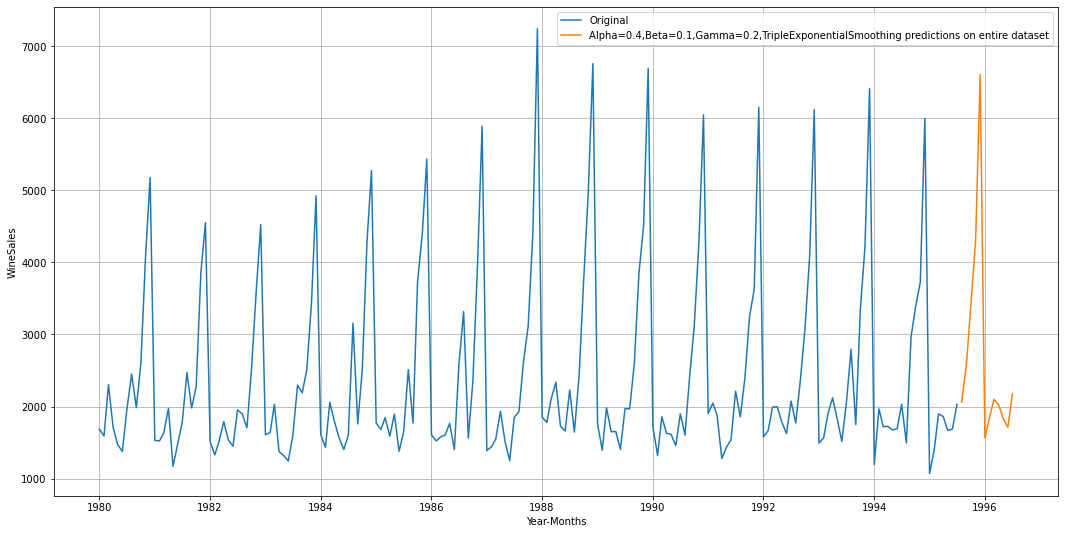

In [248]:
## Plotting on the entire data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(df['Sparkling'], label='Original')

plt.plot(model_TES_full_predict, label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on entire dataset')

plt.xlabel('Year-Months')
plt.ylabel('WineSales')
plt.legend(loc='best')
plt.grid();

Alpha=0.5,Beta=0.1,Gamma=0.3

In [249]:
model_TES_full_fit513 = model_TES_full.fit(smoothing_level=0.5,smoothing_slope=0.1,smoothing_seasonal=0.3,optimized=True,use_brute=True)
model_TES_full_predict513 = model_TES_full_fit513.forecast(steps=12)

In [261]:
model_TES_full_predict513

1995-08-01    2001.173533
1995-09-01    2704.470620
1995-10-01    3485.195723
1995-11-01    4349.379724
1995-12-01    6901.772795
1996-01-01    1530.587234
1996-02-01    1998.828841
1996-03-01    2240.305664
1996-04-01    2104.274278
1996-05-01    1881.926816
1996-06-01    1788.570441
1996-07-01    2220.267712
Freq: MS, dtype: float64

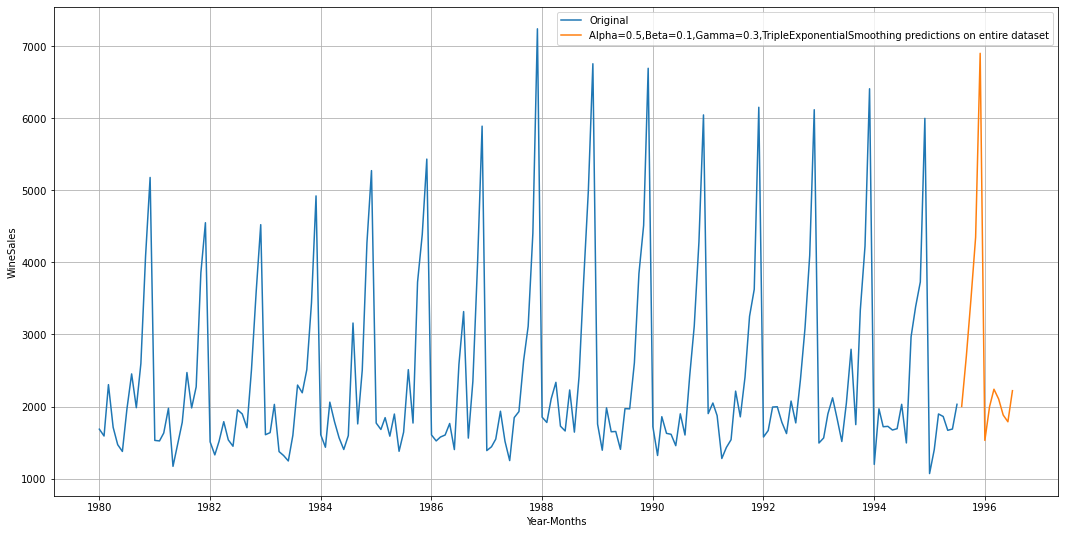

In [250]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(df['Sparkling'], label='Original')

plt.plot(model_TES_full_predict513, label='Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on entire dataset')

plt.xlabel('Year-Months')
plt.ylabel('WineSales')
plt.legend(loc='best')
plt.grid();

There is a slight difference between the two forecasted values, but we will go with the one which is giving us the least RMSE.